In [68]:
import pandas as pd
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("./gsearch_jobs1.csv", index_col=[0], parse_dates=['date_time'])

In [70]:
df.head()

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['python', 'sql', 'r', 'tableau']"
1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,18 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,12 hours ago,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'power_bi', 'excel']"
4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,7 hours ago,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['outlook', 'powerpoint', 'excel', 'word']"


In [71]:
df.columns

Index(['index', 'title', 'company_name', 'location', 'via', 'description',
       'extensions', 'job_id', 'thumbnail', 'posted_at', 'schedule_type',
       'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38655 entries, 0 to 38654
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                38655 non-null  int64         
 1   title                38655 non-null  object        
 2   company_name         38655 non-null  object        
 3   location             38628 non-null  object        
 4   via                  38646 non-null  object        
 5   description          38655 non-null  object        
 6   extensions           38655 non-null  object        
 7   job_id               38655 non-null  object        
 8   thumbnail            22415 non-null  object        
 9   posted_at            38655 non-null  object        
 10  schedule_type        38478 non-null  object        
 11  work_from_home       17213 non-null  object        
 12  salary               6617 non-null   object        
 13  search_term          38655 non-null 

In [73]:
salary = df[['salary_avg', 'salary_min', 'salary_max']].describe()
salary

,salary_avg,salary_min,salary_max
count,6617.000000,6244.000000,6244.000000
mean,34711.099782,29157.889250,41030.973752
std,51703.734882,43556.125844,61158.630702
min,7.250000,8.000000,10.000000
25%,30.500000,18.330000,44.120000
50%,57.500000,40.000000,75.000000
75%,85000.000000,72368.750000,99973.350000
max,300000.000000,275000.000000,346000.000000


As lowest value in salary average is 7.25 and highest is 300000, probably hour/annual salary are mixed.

In [74]:
hourly = df[df['salary_hourly'].notnull()] 
yearly = df[df['salary_yearly'].notnull()] 

hourly_stats = hourly[['salary_avg', 'salary_min', 'salary_max']].describe()
yearly_stats = yearly[['salary_avg', 'salary_min', 'salary_max']].describe()

hourly_stats

,salary_avg,salary_min,salary_max
count,4354.000000,4105.000000,4105.000000
mean,42.029081,30.068755,54.171790
std,22.761163,18.785877,30.646642
min,7.250000,8.000000,10.000000
25%,25.000000,16.000000,30.000000
50%,35.000000,20.000000,50.000000
75%,57.500000,40.000000,75.000000
max,300.000000,200.000000,500.000000


# HOURLY SALARIES

### Average

- mean: 42.03
- median: 35.00

### Minimum

- mean: 30.07
- median: 20.00
- lowest reported: 8

### Maximum

- mean: 54.17
- median: 50
- highest reported: 500


In [75]:
yearly_stats

,salary_avg,salary_min,salary_max
count,2248.000000,2126.000000,2126.000000
mean,102049.163726,85543.838937,120358.630484
std,31627.016109,27391.828488,37977.398462
min,29289.840000,27519.630000,35000.000000
25%,82500.000000,70000.000000,95000.000000
50%,96500.000000,77000.000000,116000.000000
75%,114812.500000,95000.000000,135000.000000
max,300000.000000,275000.000000,346000.000000


# YEARLY STATS

### Average

- mean: 102049.16
- median: 96500.00

### Minimum

- mean: 85543.84
- median: 77000.00
- lowest reported: 27519.63

### Maximum

- mean: 120358.63
- median: 116000.00
- highest reported: 346000.00

In [76]:
df['description_tokens'] = df['description_tokens'].apply(literal_eval)

In [77]:
trends = df[['date_time', 'description_tokens']]
trends = trends.explode('description_tokens')

In [78]:
trends['day'] = trends['date_time'].dt.strftime('%Y-%m')
trends = trends.drop('date_time', axis=1)
trends

,description_tokens,day
0,python,2023-08
0,sql,2023-08
0,r,2023-08
0,tableau,2023-08
1,NaN,2023-08
...,...,...
38651,NaN,2022-11
38652,NaN,2022-12
38653,NaN,2022-12
38654,tableau,2023-01


In [79]:
trends_general = trends.groupby('description_tokens').size().reset_index(name='count')
trends = trends.groupby(['day', 'description_tokens']).size().reset_index(name='count')
trends

,day,description_tokens,count
0,2022-11,airflow,19
1,2022-11,alteryx,45
2,2022-11,asp.net,3
3,2022-11,assembly,4
4,2022-11,atlassian,6
...,...,...,...
1514,2023-12,vba,35
1515,2023-12,visio,29
1516,2023-12,visual_basic,18
1517,2023-12,vue,1


In [80]:
trends_general = trends_general.sort_values('count', ascending=False).head(8)
most_wanted = trends_general['description_tokens'].to_list()
most_wanted

['sql', 'excel', 'python', 'power_bi', 'tableau', 'r', 'sas', 'powerpoint']

In [81]:
trends_general

,description_tokens,count
111,sql,19522
28,excel,13012
87,python,11178
82,power_bi,10797
116,tableau,10582
90,r,7026
97,sas,3556
83,powerpoint,2983


# TOP 8 most wanted technologies

1. sql
2. excel
3. python
4. power_bi
5. tableau
6. r
7. sas
8. powerpoint

Where python, power_bi and tableau are relatively equally sought after.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'sql'),
  Text(1, 0, 'excel'),
  Text(2, 0, 'python'),
  Text(3, 0, 'power_bi'),
  Text(4, 0, 'tableau'),
  Text(5, 0, 'r'),
  Text(6, 0, 'sas'),
  Text(7, 0, 'powerpoint')])

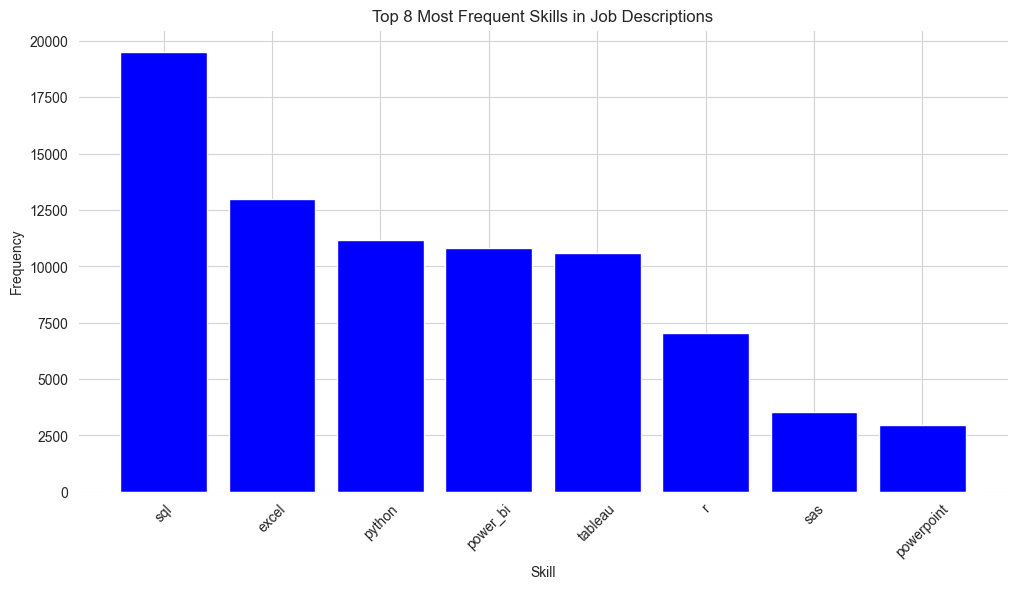

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(trends_general['description_tokens'], trends_general['count'], color='blue')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.title('Top 8 Most Frequent Skills in Job Descriptions')
plt.xticks(rotation=45)
# plt.savefig('top8all.png')

(0.0, 2100.0)

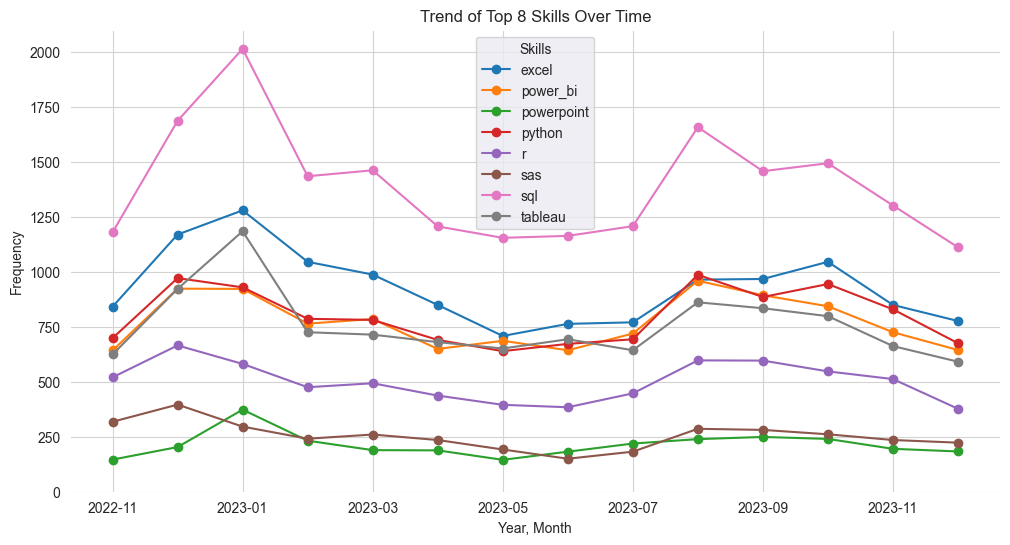

In [83]:
trend_pivot = trends[trends['description_tokens'].isin(most_wanted)]
trend_pivot = trend_pivot.pivot_table(index='day', columns='description_tokens', values='count', fill_value=0)
trend_pivot.plot(figsize=(12, 6), marker='o')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.title('Trend of Top 8 Skills Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(title='Skills')
plt.ylim(0, 2100)
# plt.savefig('top8allovertime.png')

In [84]:
trend_pivot

description_tokens,excel,power_bi,powerpoint,python,r,sas,sql,tableau
day,,,,,,,,
2022-11,841.0,642.0,146.0,698.0,520.0,318.0,1179.0,624.0
2022-12,1169.0,923.0,203.0,971.0,665.0,396.0,1686.0,922.0
2023-01,1279.0,922.0,373.0,929.0,581.0,296.0,2013.0,1184.0
2023-02,1045.0,764.0,232.0,786.0,475.0,241.0,1434.0,725.0
2023-03,987.0,785.0,189.0,781.0,493.0,260.0,1461.0,714.0
2023-04,849.0,649.0,188.0,690.0,437.0,235.0,1206.0,680.0
2023-05,708.0,686.0,145.0,639.0,395.0,192.0,1154.0,651.0
2023-06,763.0,643.0,182.0,672.0,384.0,150.0,1163.0,693.0
2023-07,770.0,719.0,219.0,693.0,447.0,182.0,1207.0,643.0


Downward trend

In [85]:
number = df[['job_id', 'date_time']]
number['day'] = number['date_time'].dt.strftime('%Y-%m')
number = number.drop('date_time', axis=1)
number

C:\Users\sugcr\AppData\Local\Temp\ipykernel_6464\4064172415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number['day'] = number['date_time'].dt.strftime('%Y-%m')


,job_id,day
0,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,2023-08
1,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,2023-08
2,eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,2023-08
3,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,2023-08
4,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,2023-08
...,...,...
38650,eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,2022-11
38651,eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,2022-11
38652,eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,2022-12
38653,eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,2022-12


In [86]:
number = number.groupby('day').size().reset_index(name='count')
number

,day,count
0,2022-11,2159
1,2022-12,3329
2,2023-01,3682
3,2023-02,2828
4,2023-03,2727
5,2023-04,2493
6,2023-05,2357
7,2023-06,2362
8,2023-07,2560
9,2023-08,3008


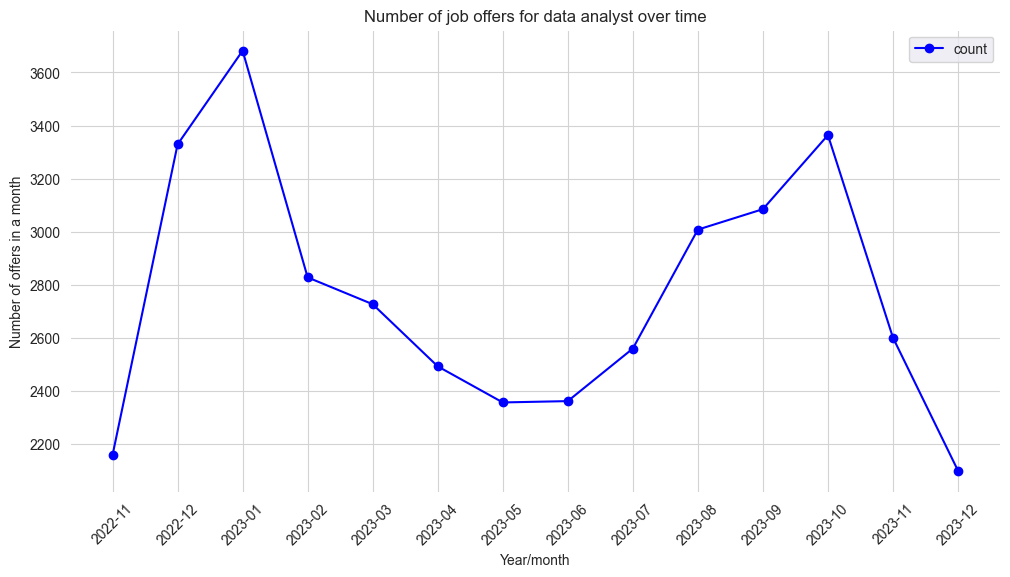

In [87]:
number.plot(marker='o', figsize=(12,6), color='blue')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.title('Number of job offers for data analyst over time')
plt.ylabel('Number of offers in a month')
plt.xlabel('Year/month')
plt.xticks(ticks=range(len(number['day'])), labels=number['day'].astype(str), rotation=45)
plt.grid(True)
# plt.savefig('jobcount.png')

In [88]:
via = df['via'].value_counts().head(10)
via.index.tolist()

['via LinkedIn',
 'via Upwork',
 'via BeBee',
 'via Trabajo.org',
 'via ZipRecruiter',
 'via Indeed',
 'via Snagajob',
 'via Adzuna',
 'via Jobs Trabajo.org',
 'via Monster']

<Axes: title={'center': 'Number of job offers posted on different sites'}, xlabel='via', ylabel='Number of job offers'>

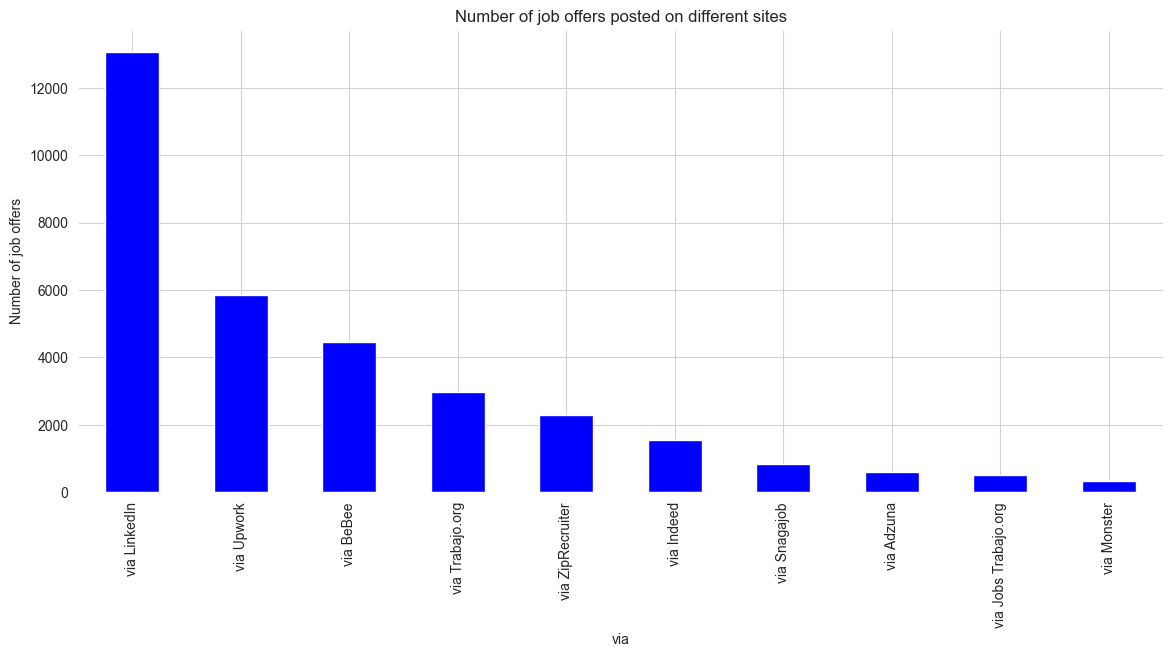

In [89]:
plt.figure(figsize=(14,6))
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.xlabel('Site')
plt.ylabel('Number of job offers')
plt.title('Number of job offers posted on different sites')
via.plot(kind='bar', color='blue')
# plt.savefig('jobsites.png')

# Site job listings

These are top 10 sites where most job offers are posted

1. LinkedIn
2. Upwork
3. BeBee
4. Trabajo.org
5. ZipRecruiter
6. Indeed
7. Snagajob
8. Adzuna
9. Jobs Trabajo.org
10. Monster


In [90]:
via

via
via LinkedIn            13059
via Upwork               5852
via BeBee                4456
via Trabajo.org          2986
via ZipRecruiter         2283
via Indeed               1558
via Snagajob              846
via Adzuna                609
via Jobs Trabajo.org      518
via Monster               337
Name: count, dtype: int64

Text(0, 0.5, 'Count')

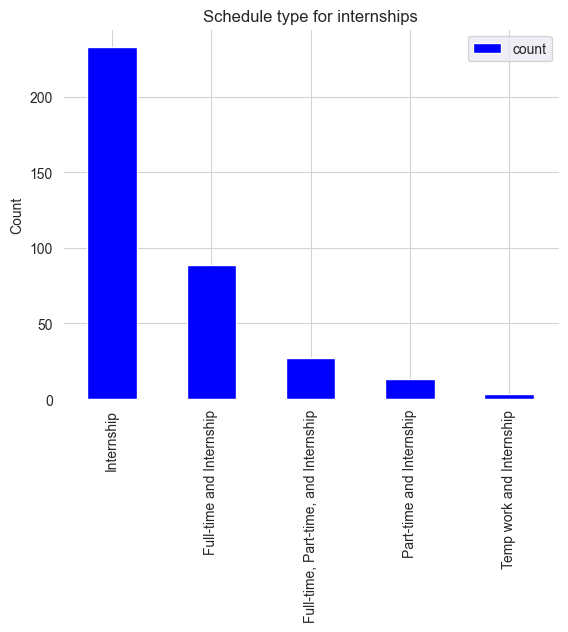

In [91]:
interns = df[df['schedule_type'].notnull()]
interns = interns[['job_id', 'schedule_type', 'description_tokens', 'date_time']]
interns = interns[interns['schedule_type'].str.contains('intern', case=False)]
interns['day'] = interns['date_time'].dt.strftime('%Y-%m')
interns['day'] = pd.to_datetime(interns['day'])
interns_schedule = interns.groupby('schedule_type').size().reset_index(name='count').sort_values('count', ascending=False)


interns_schedule.plot(kind='bar', color='blue')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.xticks(ticks=range(len(interns_schedule['schedule_type'])), labels=interns_schedule['schedule_type'])
plt.title('Schedule type for internships')
# plt.xlabel('Schedule type')
plt.ylabel('Count')
# plt.savefig('scheduletypeintern.png')

In [92]:
interns_skills = interns.drop(['job_id', 'date_time'], axis=1).explode('description_tokens')
interns_skills

,schedule_type,description_tokens,day
276,Internship,powerpoint,2023-08-01
276,Internship,sql,2023-08-01
276,Internship,word,2023-08-01
276,Internship,tableau,2023-08-01
276,Internship,excel,2023-08-01
...,...,...,...
37726,Internship,powerpoint,2023-02-01
37726,Internship,excel,2023-02-01
37726,Internship,sharepoint,2023-02-01
38613,Internship,sql,2023-03-01


In [93]:
interns_skills_general = interns_skills.groupby('description_tokens').size().reset_index(name='count')
interns_skills_general = interns_skills_general.sort_values('count', ascending=False).head(10)
skills_intern = interns_skills_general['description_tokens'].tolist()

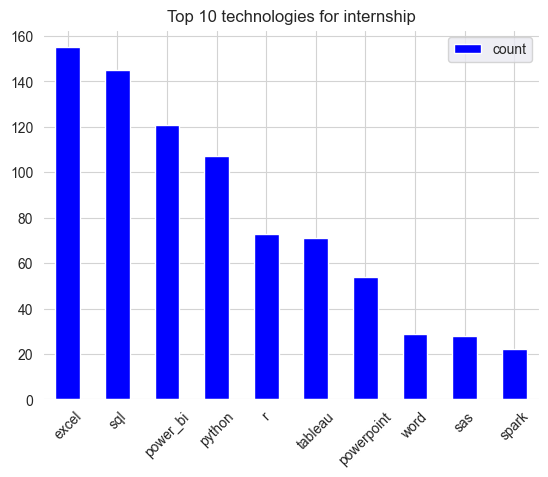

In [94]:
interns_skills_general.plot(kind='bar', color='blue')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.title('Top 10 technologies for internship')
plt.xticks(ticks=range(len(interns_skills_general['description_tokens'])), labels=interns_skills_general['description_tokens'], rotation=45)
plt.show()
# plt.savefig('technoforinterns.png')

In [95]:
interns_skills_time = interns_skills[interns_skills['description_tokens'].isin(skills_intern)]
interns_skills_time = interns_skills_time.groupby(['day', 'description_tokens']).size().reset_index(name='count').sort_values('count', ascending=False)
interns_skills_time

,day,description_tokens,count
1,2022-12-01,excel,33
71,2023-10-01,power_bi,32
77,2023-10-01,sql,32
96,2023-12-01,sql,30
89,2023-12-01,excel,28
...,...,...,...
42,2023-06-01,powerpoint,1
43,2023-06-01,python,1
44,2023-06-01,r,1
47,2023-06-01,word,1


Text(0.5, 0, 'Year/Month')

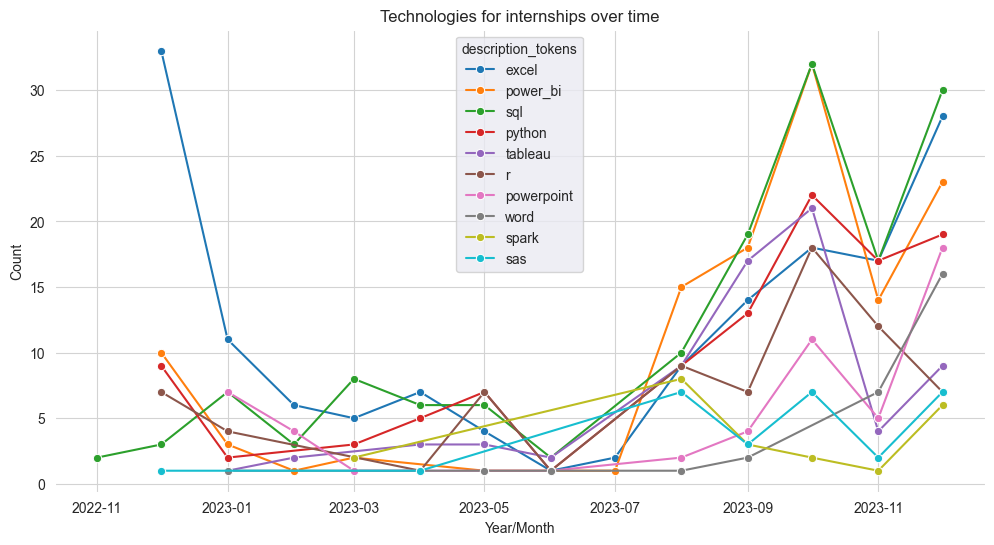

In [96]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
sns.lineplot(x='day', y='count', data=interns_skills_time, hue='description_tokens', marker='o')
plt.title('Technologies for internships over time')
plt.ylabel('Count')
plt.xlabel('Year/Month')
# plt.savefig('technoforinternsovertime.png')

# Notable changes (Internships)

## Excel
Started with the highest demand, and ended with second position.

## Python
Ended as most wanted technology for interns

## R 
In serious decline

## AWS, SPARK
Only technologies that'd seen any increase in demand in the last month.



<Axes: title={'center': 'Top 8 technologies for intern'}, xlabel='Technology', ylabel='Count'>

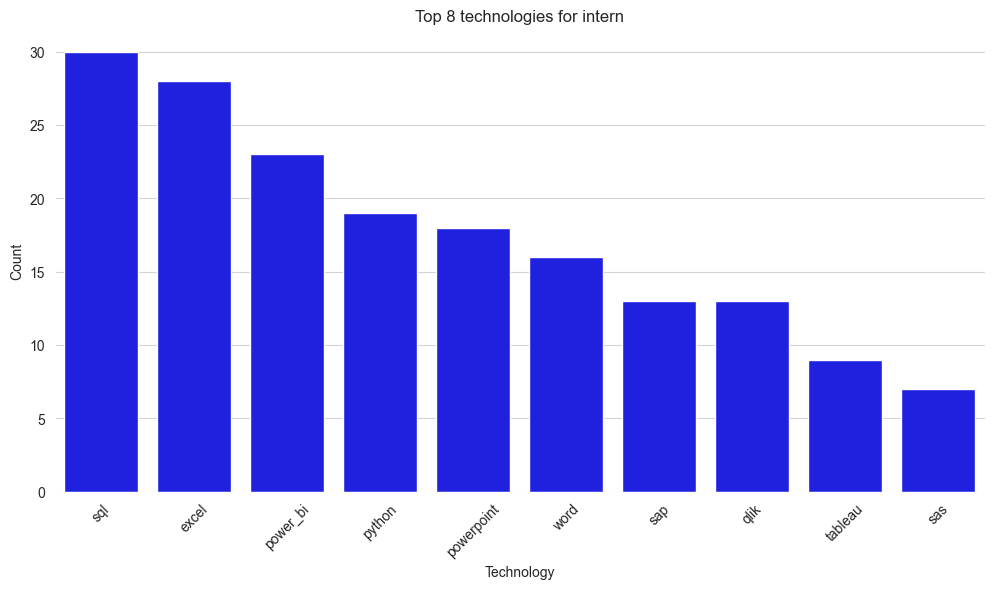

In [97]:
interns_skills_time_last = interns_skills[interns_skills['day'].astype(str).str.contains('2023-12')]
interns_skills_time_last = interns_skills_time_last.groupby('description_tokens').size().reset_index(name='count').sort_values('count', ascending=False).head(10)


plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.title('Top 8 technologies for intern')
plt.ylabel('Count')
plt.xlabel('Technology')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
sns.barplot(x='description_tokens', y='count', data=interns_skills_time_last, color='blue')
# plt.savefig('toptechnologiesintern.png')

In [111]:
interns_skills_time_check = ['r', 'spark', 'qlik', 'sap']
interns_skills_time_last_trend = interns_skills[interns_skills['description_tokens'].isin(interns_skills_time_check)].drop('schedule_type', axis=1)
interns_skills_time_last_trend = interns_skills_time_last_trend.groupby(['day', 'description_tokens']).size().reset_index(name='count')
interns_skills_time_last_trend.sort_values('day')

,day,description_tokens,count
0,2022-12-01,r,7
1,2023-01-01,r,4
2,2023-03-01,spark,2
3,2023-04-01,r,1
4,2023-05-01,r,7
5,2023-06-01,r,1
6,2023-08-01,r,9
7,2023-08-01,spark,8
8,2023-09-01,r,7
9,2023-09-01,spark,3


Text(0.5, 0, 'Year/Month')

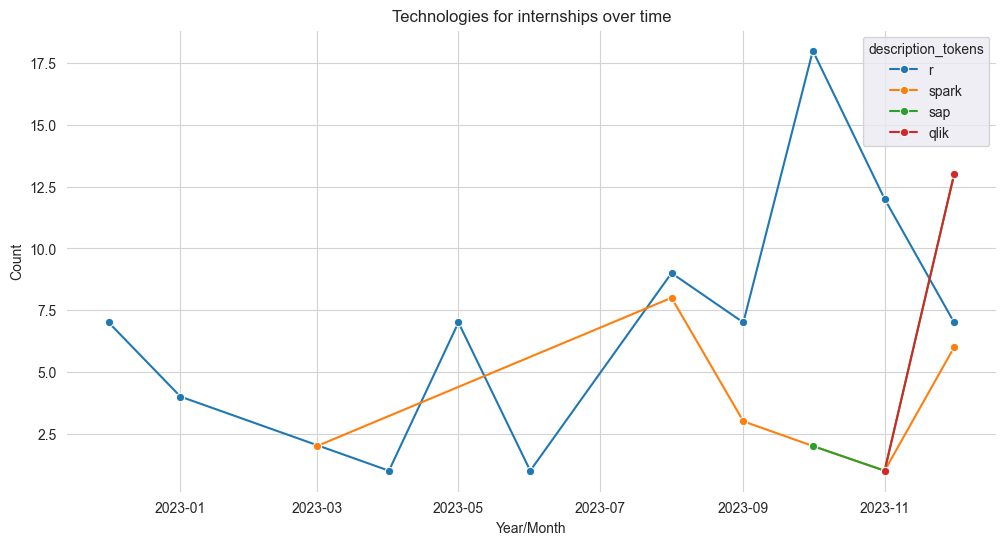

In [99]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
sns.lineplot(x='day', y='count', data=interns_skills_time_last_trend, hue='description_tokens', marker='o')
plt.title('Technologies for internships over time')
plt.ylabel('Count')
plt.xlabel('Year/Month')

# Notable changes (Internships)

### R, SAS, AWS
Not present.

### Alteryx, Aurora, MySql
Are now present

Text(0.5, 0, 'Year/Month')

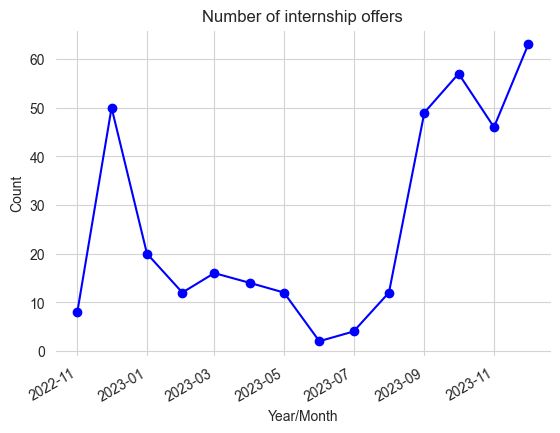

In [100]:
interns.day.value_counts().plot(kind='line', marker='o', color='blue')
plt.gca().set_facecolor('white')
plt.grid(color='lightgrey')
plt.title('Number of internship offers')
plt.ylabel('Count')
plt.xlabel('Year/Month')
# plt.savefig('internshipcount.png')

In [101]:
x = interns.day.value_counts()
x = pd.DataFrame(x).sort_values('day')
x

,count
day,
2022-11-01,8
2022-12-01,50
2023-01-01,20
2023-02-01,12
2023-03-01,16
2023-04-01,14
2023-05-01,12
2023-06-01,2
2023-07-01,4


In [102]:
df.head()

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"[python, sql, r, tableau]"
1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,18 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[sql]
3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,12 hours ago,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"[powerpoint, power_bi, excel]"
4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,7 hours ago,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"[outlook, powerpoint, excel, word]"


In [103]:
# filter lists that are empty or have only one skill
lol = [li for li in df['description_tokens'] if len(li) > 1]
top = interns_skills_general['description_tokens'].to_list()

pairs = []
for i in range(len(top) - 1):
    for j in range(i + 1, len(top)):
        pair = (top[i], top[j])
        pairs.append(pair)
        
# If not initialized beforehand rises KeyError
co_occu = dict()
for pair in pairs:
    co_occu[(pair)] = 0

for li in lol:
    for pair in pairs:
        if pair[0] in li:
            if pair[1] in li:
                co_occu[(pair)] += 1
 
df_occu =pd.DataFrame(co_occu.items(), columns=['skills', 'occurrences'])
df_occu.head()

,skills,occurrences
0,"(excel, sql)",7636
1,"(excel, power_bi)",4803
2,"(excel, python)",3678
3,"(excel, r)",2650
4,"(excel, tableau)",4483


In [104]:
df_occu[['skill_1', 'skill_2']] = pd.DataFrame(df_occu['skills'].tolist(), index=df_occu.index)
print(df_occu.head())

              skills  occurrences skill_1   skill_2
0       (excel, sql)         7636   excel       sql
1  (excel, power_bi)         4803   excel  power_bi
2    (excel, python)         3678   excel    python
3         (excel, r)         2650   excel         r
4   (excel, tableau)         4483   excel   tableau


In [105]:
def show_top_co(skill: str, n=5) -> None:
    print(df_occu[df_occu['skill_1'].isin([skill]) | df_occu['skill_2'].isin([skill])].sort_values(by='occurrences', ascending=False).head(n))

In [106]:
for skill in top:
    print(f'{skill}:________')
    show_top_co(skill, 6)
    print('___________________________________')

excel:________
                skills  occurrences skill_1     skill_2
0         (excel, sql)         7636   excel         sql
1    (excel, power_bi)         4803   excel    power_bi
4     (excel, tableau)         4483   excel     tableau
2      (excel, python)         3678   excel      python
5  (excel, powerpoint)         2831   excel  powerpoint
3           (excel, r)         2650   excel           r
___________________________________
sql:________
             skills  occurrences skill_1   skill_2
10    (sql, python)         8955     sql    python
12   (sql, tableau)         8455     sql   tableau
0      (excel, sql)         7636   excel       sql
9   (sql, power_bi)         7276     sql  power_bi
11         (sql, r)         5620     sql         r
15       (sql, sas)         2866     sql       sas
___________________________________
power_bi:________
                 skills  occurrences   skill_1   skill_2
9       (sql, power_bi)         7276       sql  power_bi
19  (power_bi, tabl

In [107]:
# Not that important as there can't be any new surprising technology, but maybe i will comeback to it.